In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing_owners = pd.read_csv('fema_data/chi_housing_assistance_owners.csv')
housing_owners['zipCode'] = housing_owners['zipCode'].fillna(0).astype(int).astype(str)
housing_renters = pd.read_csv('fema_data/chi_housing_assistance_renters.csv')
housing_renters['zipCode'] = housing_renters['zipCode'].fillna(0).astype(int).astype(str)
combined_fema_df = pd.concat([housing_owners[['zipCode', 'approvedForFemaAssistance', 'totalApprovedIhpAmount']],
                              housing_renters[['zipCode', 'approvedForFemaAssistance', 'totalApprovedIhpAmount']]])
combined_fema_df.head()

,zipCode,approvedForFemaAssistance,totalApprovedIhpAmount
0,60637,0.0,0.0
1,60641,0.0,0.0
2,60628,1.0,1888.0
3,60468,0.0,0.0
4,60613,3.0,20496.0


In [3]:
combined_fema_zips = pd.DataFrame(combined_fema_df.groupby(['zipCode']).agg({'approvedForFemaAssistance': 'sum',
                                                                             'totalApprovedIhpAmount': 'sum'})).reset_index()
combined_fema_zips = combined_fema_zips.dropna()
combined_fema_zips.head()

,zipCode,totalApprovedIhpAmount,approvedForFemaAssistance
1,60020,1532.0,1.0
2,60104,4953.0,2.0
3,60131,0.0,0.0
4,60155,0.0,0.0
5,60290,6769.0,4.0


In [4]:
wib_07_df = pd.read_csv('311_data/wib_calls_311_zip.csv')
wib_07_df['Created Date'] = pd.to_datetime(wib_07_df['Created Date'])
wib_07_df = wib_07_df.set_index(wib_07_df['Created Date'])
wib_07_df = wib_07_df['2007-01-01':][wib_07_df.columns.values[2:]]
wib_07_stack = pd.DataFrame(wib_07_df.stack()).reset_index()
wib_07_stack = wib_07_stack.rename(columns={'level_0':'Created Date','level_1':'Zip Code',0:'Count Calls'})
wib_07_sum = wib_07_stack.groupby(['Zip Code'])['Count Calls'].sum()
wib_07_sum = wib_07_sum.reset_index()
wib_07_sum = wib_07_sum.sort_values(by='Count Calls',ascending=False)
wib_07_sum.head()

,Zip Code,Count Calls
26,60628,6893
18,60619,6575
27,60629,6215
16,60617,5771
19,60620,5518


In [5]:
wib_07_zips = wib_07_sum['Zip Code'].unique()
fema_zip_df = combined_fema_zips.loc[combined_fema_zips['zipCode'].isin(wib_07_zips)].copy()
fema_zip_df.head()

,zipCode,totalApprovedIhpAmount,approvedForFemaAssistance
11,60601,0.0,0.0
12,60604,4079.0,2.0
13,60605,150.0,1.0
14,60606,2829.0,1.0
15,60607,164883.0,90.0


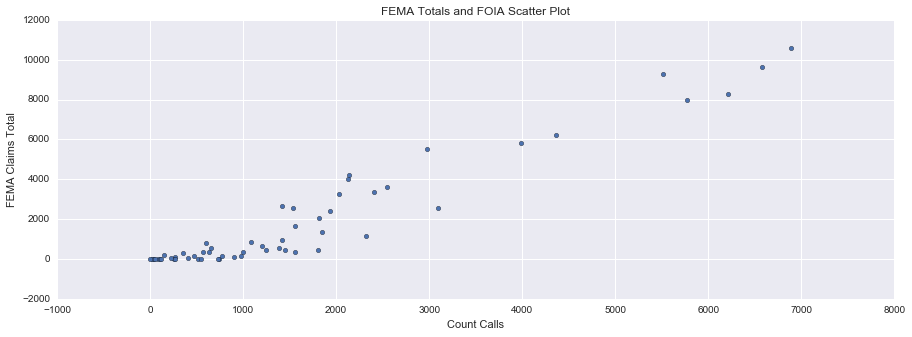

In [6]:
plt.rcParams["figure.figsize"] = [15, 5]
fema_wib_zip = pd.DataFrame()
fema_wib_zip[['Zip Code', 'FEMA Approved', 'FEMA Claims Total']] = fema_zip_df.copy()
fema_wib_zip = fema_wib_zip.merge(wib_07_sum, on='Zip Code')
fema_wib_zip.plot(title='FEMA Totals and FOIA Scatter Plot', x='Count Calls', y='FEMA Claims Total', kind='scatter')

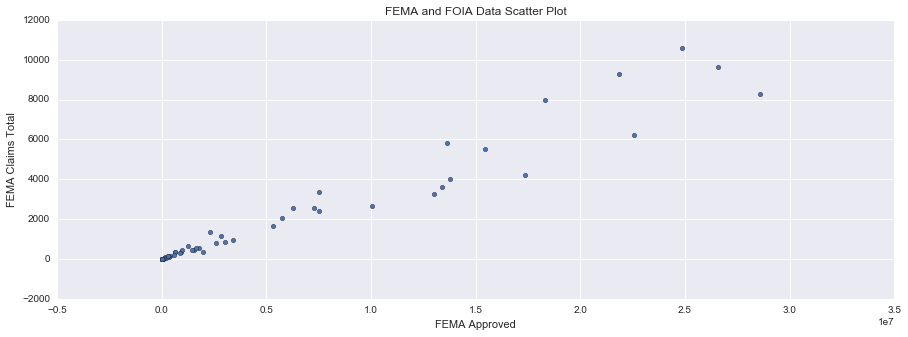

In [7]:
# Total dollar amount of FEMA claims generally seems to line up with the number of approved claims by zip
fema_wib_zip.plot(title='FEMA and FOIA Data Scatter Plot', x='FEMA Approved', y='FEMA Claims Total', kind='scatter')

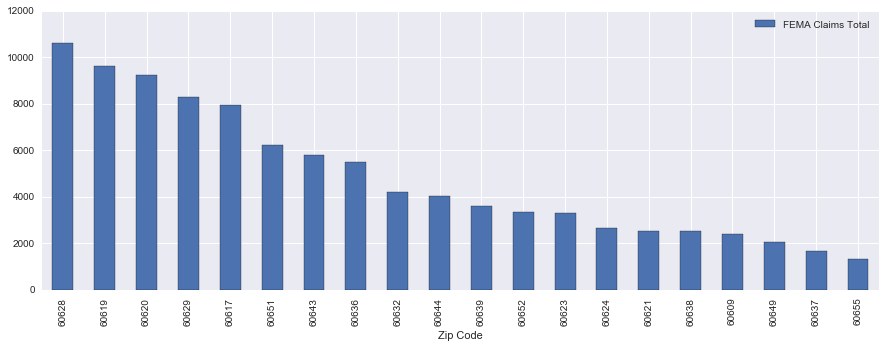

In [8]:
fema_zips_by_total = fema_wib_zip.sort_values(by='FEMA Claims Total', ascending=False)[:20].copy()
fema_zips_by_total.plot(kind='bar', x='Zip Code', y='FEMA Claims Total')

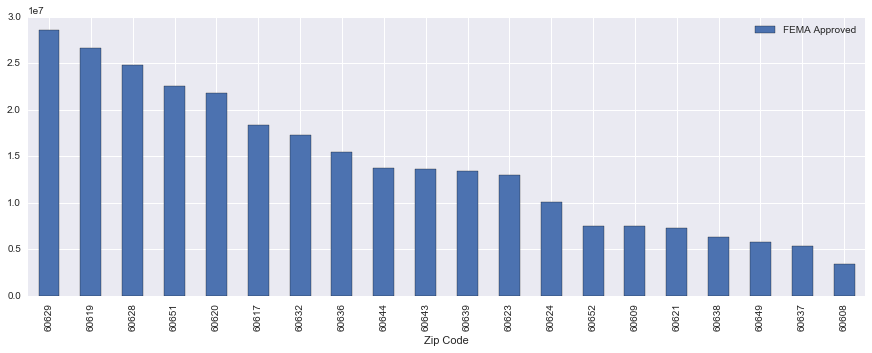

In [9]:
fema_zips_by_approved = fema_wib_zip.sort_values(by='FEMA Approved', ascending=False)[:20].copy()
fema_zips_by_approved.plot(kind='bar', x='Zip Code', y='FEMA Approved')